<a href="https://colab.research.google.com/github/BhaavyaShukla/BhaavyaShukla/blob/main/Pattern_Recognition_and_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Reading the data
import pandas as pd
data = pd.read_csv("/content/train.csv")
print(data)

        x          y
0    24.0  21.549452
1    50.0  47.464463
2    15.0  17.218656
3    38.0  36.586398
4    87.0  87.288984
..    ...        ...
695  58.0  58.595006
696  93.0  94.625094
697  82.0  88.603770
698  66.0  63.648685
699  97.0  94.975266

[700 rows x 2 columns]


In [ ]:
# preprocessing
# detection of null values
nu = data['y'].isnull()
s = sum(nu)
# filling the data with mean value
meaa = data['y'].mean()
data['y'] = data['y'].fillna(meaa)

In [ ]:
# Implementing the simple linear regression
# finding out the slope of the line first
n = len(data)

data['xy'] = data['x']*data['y']

sum_xy = sum(data['xy'])
data['x^2'] = data['x'] * data['x']

sum_x = sum(data['x'])
sum_x2 = sum(data['x^2'])
sum_y = sum(data['y'])

numerator =((n*sum_xy) - (sum_x*sum_y))
denominator = ((n*sum_x2) - (sum_x**2))

m =  numerator / denominator
b = (sum_y - (m*sum_x))/n

In [ ]:
print(b)

51.400466270549614


In [ ]:
# Prediction
test_data = pd.read_csv('/content/test.csv')
test_data['y_pred'] = (m*test_data['x']) + b
print(test_data)

      x          y     y_pred
0    77  79.775152  50.956539
1    21  23.177279  48.370304
2    22  25.609262  48.416487
3    20  17.857388  48.324122
4    36  41.849864  49.063046
..   ..        ...        ...
295  71  68.545888  50.679443
296  46  47.334876  49.524874
297  55  54.090637  49.940519
298  62  63.297171  50.263798
299  47  52.459467  49.571056

[300 rows x 3 columns]


In [ ]:
# error
err = test_data['y'] - test_data['y_pred']
# print(err)
serr = err*err
mean_s_e = sum(serr)/n
print(mean_s_e)

330.1291206972763


In [ ]:
 # now rotate the line
m = m +0.47
print(m)

0.5161827685682447


In [ ]:
test_data['y_pred2'] = (m*test_data['x']) + b
print(test_data)

      x          y     y_pred    y_pred2
0    77  79.775152  50.956539  87.146539
1    21  23.177279  48.370304  58.240304
2    22  25.609262  48.416487  58.756487
3    20  17.857388  48.324122  57.724122
4    36  41.849864  49.063046  65.983046
..   ..        ...        ...        ...
295  71  68.545888  50.679443  84.049443
296  46  47.334876  49.524874  71.144874
297  55  54.090637  49.940519  75.790519
298  62  63.297171  50.263798  79.403798
299  47  52.459467  49.571056  71.661056

[300 rows x 4 columns]


In [ ]:
m = m + 0.47
b = b + 2

In [ ]:
print(b)

51.400466270549614


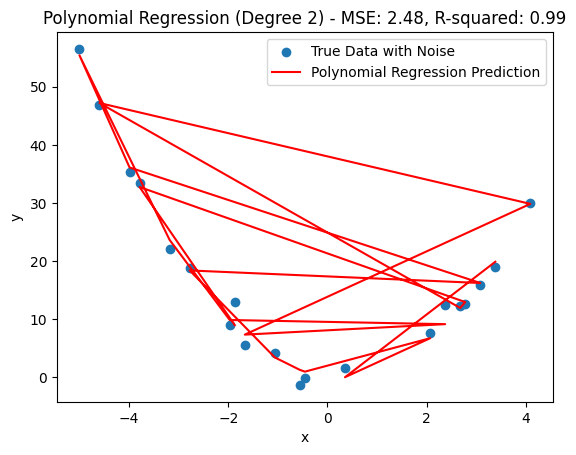

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

np.random.seed(42)

num_points = 100
x = np.linspace(-5, 5, num_points)

true_coefficients = [2, -1, 0.5]
y_true = np.polyval(true_coefficients, x)
noise = np.random.normal(0, 2, num_points)
y = y_true + noise

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

degree = 2
poly_features = PolynomialFeatures(degree=degree)
x_poly_train = poly_features.fit_transform(x_train.reshape(-1, 1))
x_poly_test = poly_features.transform(x_test.reshape(-1, 1))

model = LinearRegression()
model.fit(x_poly_train, y_train)

y_pred = model.predict(x_poly_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

plt.scatter(x_test, y_test, label='True Data with Noise')
plt.plot(x_test, y_pred, color='red', label='Polynomial Regression Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Polynomial Regression (Degree {degree}) - MSE: {mse:.2f}, R-squared: {r2:.2f}')
plt.legend()
plt.show()


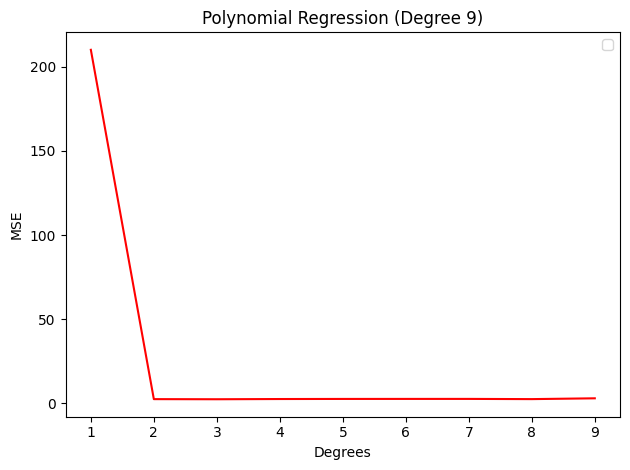

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

np.random.seed(42)

num_points = 100
x = np.linspace(-5, 5, num_points)

true_coefficients = [2,-1,  0.5]
y_true = np.polyval(true_coefficients, x)
noise = np.random.normal(0, 2, num_points)
y = y_true + noise

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
w
degrees = range(1, 10)

mse = list()
r2 = list()
for i, degree in enumerate(degrees, start=1):


    poly_features = PolynomialFeatures(degree=degree)
    x_poly_train = poly_features.fit_transform(x_train.reshape(-1, 1))
    x_poly_test = poly_features.transform(x_test.reshape(-1, 1))

    model = LinearRegression()
    model.fit(x_poly_train, y_train)

    y_pred = model.predict(x_poly_test)

    mse.append(mean_squared_error(y_test, y_pred))
    r2.append(r2_score(y_test, y_pred))


plt.plot(degrees, mse, color='red')
plt.xlabel('Degrees')
plt.ylabel('MSE')
plt.title(f'Polynomial Regression (Degree {degree})')
plt.legend()
plt.tight_layout()
plt.show()

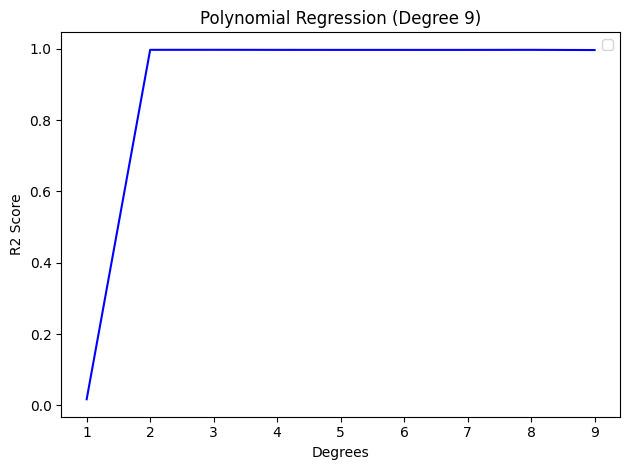

In [ ]:
plt.plot(degrees, r2, color='blue')
plt.xlabel('Degrees')
plt.ylabel('R2 Score')
plt.title(f'Polynomial Regression (Degree {degree})')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Refer to the ASD project

Local Outlier Factor

In [ ]:
# To know about Local outlier Factor visualizing it and color coding the outliers differently
from sklearn.datasets import load_wine
data = load_wine()
print(data.DESCR)

Visualising the dataset

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


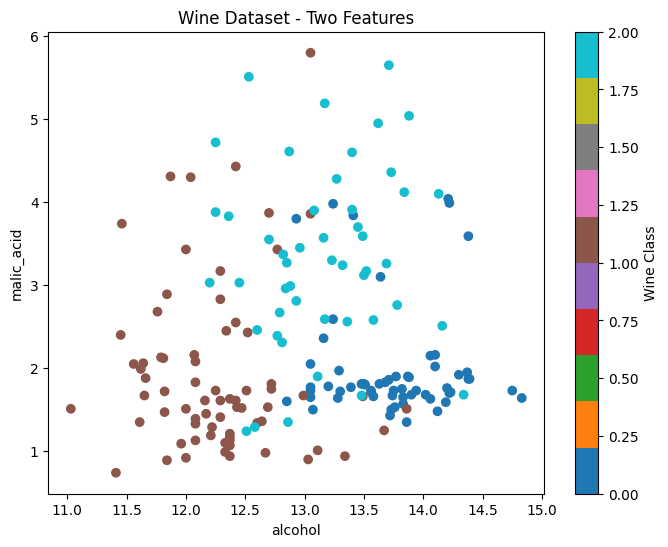

In [ ]:
import matplotlib.pyplot as plt
X = data.data
y = data.target
# Create a scatter plot of two features
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.tab10)
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title('Wine Dataset - Two Features')
plt.colorbar(label='Wine Class')
plt.show()


Outliers:
[1.32e+01 1.78e+00 2.14e+00 1.12e+01 1.00e+02 2.65e+00 2.76e+00 2.60e-01
 1.28e+00 4.38e+00 1.05e+00 3.40e+00 1.05e+03]
[1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
 3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]
[1.438e+01 1.870e+00 2.380e+00 1.200e+01 1.020e+02 3.300e+00 3.640e+00
 2.900e-01 2.960e+00 7.500e+00 1.200e+00 3.000e+00 1.547e+03]
[1.419e+01 1.590e+00 2.480e+00 1.650e+01 1.080e+02 3.300e+00 3.930e+00
 3.200e-01 1.860e+00 8.700e+00 1.230e+00 2.820e+00 1.680e+03]
[1.364e+01 3.100e+00 2.560e+00 1.520e+01 1.160e+02 2.700e+00 3.030e+00
 1.700e-01 1.660e+00 5.100e+00 9.600e-01 3.360e+00 8.450e+02]
[1.305e+01 2.050e+00 3.220e+00 2.500e+01 1.240e+02 2.630e+00 2.680e+00
 4.700e-01 1.920e+00 3.580e+00 1.130e+00 3.200e+00 8.300e+02]
[1.376e+01 1.530e+00 2.700e+00 1.950e+01 1.320e+02 2.950e+00 2.740e+00
 5.000e-01 1.350e+00 5.400e+00 1.250e+00 3.000e+00 1.235e+03]
[1.421e+01 4.040e+00 2.440e+00 1.890e+01 1.110e+02 2.850e+00 2.650e+00
 

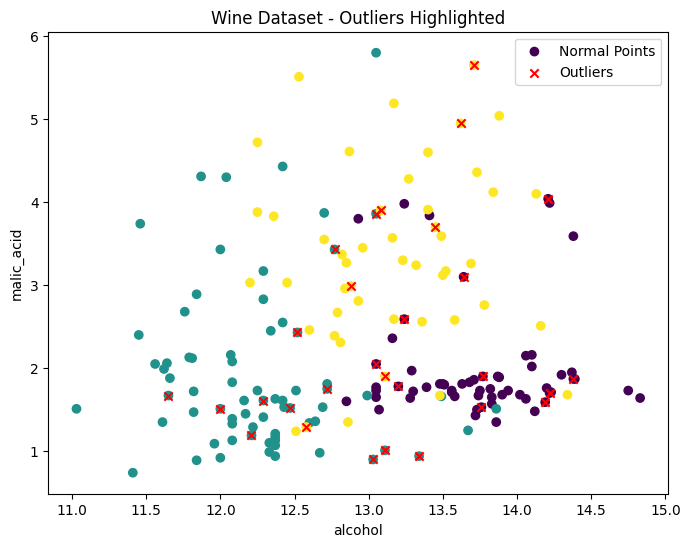

Outliers:
[1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
 3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]
[1.375e+01 1.730e+00 2.410e+00 1.600e+01 8.900e+01 2.600e+00 2.760e+00
 2.900e-01 1.810e+00 5.600e+00 1.150e+00 2.900e+00 1.320e+03]
[1.383e+01 1.570e+00 2.620e+00 2.000e+01 1.150e+02 2.950e+00 3.400e+00
 4.000e-01 1.720e+00 6.600e+00 1.130e+00 2.570e+00 1.130e+03]
[1.419e+01 1.590e+00 2.480e+00 1.650e+01 1.080e+02 3.300e+00 3.930e+00
 3.200e-01 1.860e+00 8.700e+00 1.230e+00 2.820e+00 1.680e+03]
[1.293e+01 3.800e+00 2.650e+00 1.860e+01 1.020e+02 2.410e+00 2.410e+00
 2.500e-01 1.980e+00 4.500e+00 1.030e+00 3.520e+00 7.700e+02]
[1.387e+01 1.900e+00 2.800e+00 1.940e+01 1.070e+02 2.950e+00 2.970e+00
 3.700e-01 1.760e+00 4.500e+00 1.250e+00 3.400e+00 9.150e+02]
[1.376e+01 1.530e+00 2.700e+00 1.950e+01 1.320e+02 2.950e+00 2.740e+00
 5.000e-01 1.350e+00 5.400e+00 1.250e+00 3.000e+00 1.235e+03]
[1.348e+01 1.810e+00 2.410e+00 2.050e+01 1.000e+02 2.700e+0

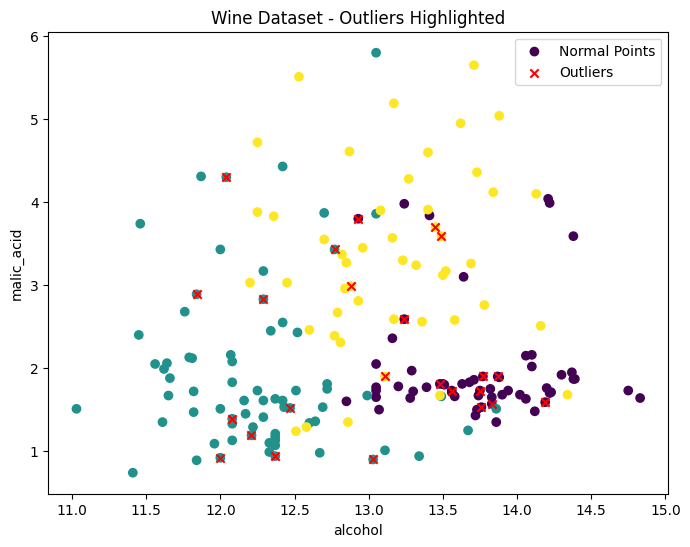

Outliers:
[1.375e+01 1.730e+00 2.410e+00 1.600e+01 8.900e+01 2.600e+00 2.760e+00
 2.900e-01 1.810e+00 5.600e+00 1.150e+00 2.900e+00 1.320e+03]
[1.419e+01 1.590e+00 2.480e+00 1.650e+01 1.080e+02 3.300e+00 3.930e+00
 3.200e-01 1.860e+00 8.700e+00 1.230e+00 2.820e+00 1.680e+03]
[1.387e+01 1.900e+00 2.800e+00 1.940e+01 1.070e+02 2.950e+00 2.970e+00
 3.700e-01 1.760e+00 4.500e+00 1.250e+00 3.400e+00 9.150e+02]
[1.376e+01 1.530e+00 2.700e+00 1.950e+01 1.320e+02 2.950e+00 2.740e+00
 5.000e-01 1.350e+00 5.400e+00 1.250e+00 3.000e+00 1.235e+03]
[1.348e+01 1.810e+00 2.410e+00 2.050e+01 1.000e+02 2.700e+00 2.980e+00
 2.600e-01 1.860e+00 5.100e+00 1.040e+00 3.470e+00 9.200e+02]
[1.377e+01 1.900e+00 2.680e+00 1.710e+01 1.150e+02 3.000e+00 2.790e+00
 3.900e-01 1.680e+00 6.300e+00 1.130e+00 2.930e+00 1.375e+03]
[1.221e+01 1.190e+00 1.750e+00 1.680e+01 1.510e+02 1.850e+00 1.280e+00
 1.400e-01 2.500e+00 2.850e+00 1.280e+00 3.070e+00 7.180e+02]
[1.303e+01 9.000e-01 1.710e+00 1.600e+01 8.600e+01 1.950e+0

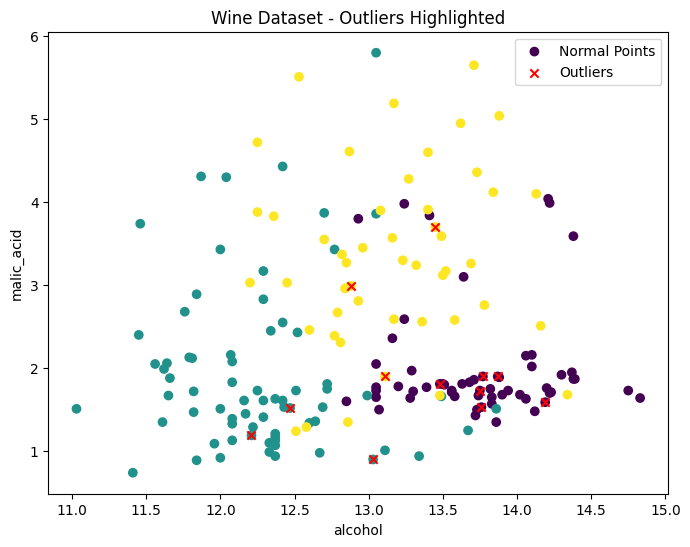

Outliers:
[1.375e+01 1.730e+00 2.410e+00 1.600e+01 8.900e+01 2.600e+00 2.760e+00
 2.900e-01 1.810e+00 5.600e+00 1.150e+00 2.900e+00 1.320e+03]
[1.363e+01 1.810e+00 2.700e+00 1.720e+01 1.120e+02 2.850e+00 2.910e+00
 3.000e-01 1.460e+00 7.300e+00 1.280e+00 2.880e+00 1.310e+03]
[1.419e+01 1.590e+00 2.480e+00 1.650e+01 1.080e+02 3.300e+00 3.930e+00
 3.200e-01 1.860e+00 8.700e+00 1.230e+00 2.820e+00 1.680e+03]
[1.285e+01 1.600e+00 2.520e+00 1.780e+01 9.500e+01 2.480e+00 2.370e+00
 2.600e-01 1.460e+00 3.930e+00 1.090e+00 3.630e+00 1.015e+03]
[1.387e+01 1.900e+00 2.800e+00 1.940e+01 1.070e+02 2.950e+00 2.970e+00
 3.700e-01 1.760e+00 4.500e+00 1.250e+00 3.400e+00 9.150e+02]
[1.376e+01 1.530e+00 2.700e+00 1.950e+01 1.320e+02 2.950e+00 2.740e+00
 5.000e-01 1.350e+00 5.400e+00 1.250e+00 3.000e+00 1.235e+03]
[1.348e+01 1.810e+00 2.410e+00 2.050e+01 1.000e+02 2.700e+00 2.980e+00
 2.600e-01 1.860e+00 5.100e+00 1.040e+00 3.470e+00 9.200e+02]
[1.377e+01 1.900e+00 2.680e+00 1.710e+01 1.150e+02 3.000e+0

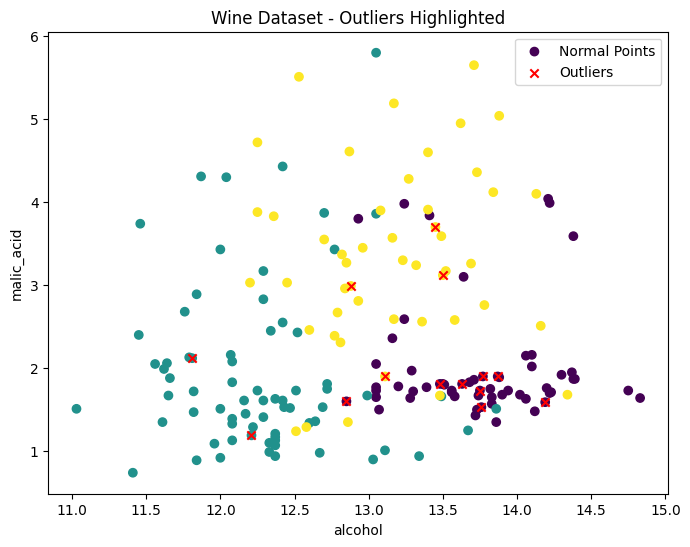

Outliers:
[1.375e+01 1.730e+00 2.410e+00 1.600e+01 8.900e+01 2.600e+00 2.760e+00
 2.900e-01 1.810e+00 5.600e+00 1.150e+00 2.900e+00 1.320e+03]
[1.376e+01 1.530e+00 2.700e+00 1.950e+01 1.320e+02 2.950e+00 2.740e+00
 5.000e-01 1.350e+00 5.400e+00 1.250e+00 3.000e+00 1.235e+03]
[1.377e+01 1.900e+00 2.680e+00 1.710e+01 1.150e+02 3.000e+00 2.790e+00
 3.900e-01 1.680e+00 6.300e+00 1.130e+00 2.930e+00 1.375e+03]
[1.221e+01 1.190e+00 1.750e+00 1.680e+01 1.510e+02 1.850e+00 1.280e+00
 1.400e-01 2.500e+00 2.850e+00 1.280e+00 3.070e+00 7.180e+02]
[1.184e+01 2.890e+00 2.230e+00 1.800e+01 1.120e+02 1.720e+00 1.320e+00
 4.300e-01 9.500e-01 2.650e+00 9.600e-01 2.520e+00 5.000e+02]
[ 12.     0.92   2.    19.    86.     2.42   2.26   0.3    1.43   2.5
   1.38   3.12 278.  ]
[1.247e+01 1.520e+00 2.200e+00 1.900e+01 1.620e+02 2.500e+00 2.270e+00
 3.200e-01 3.280e+00 2.600e+00 1.160e+00 2.630e+00 9.370e+02]
[1.288e+01 2.990e+00 2.400e+00 2.000e+01 1.040e+02 1.300e+00 1.220e+00
 2.400e-01 8.300e-01 5.400e+

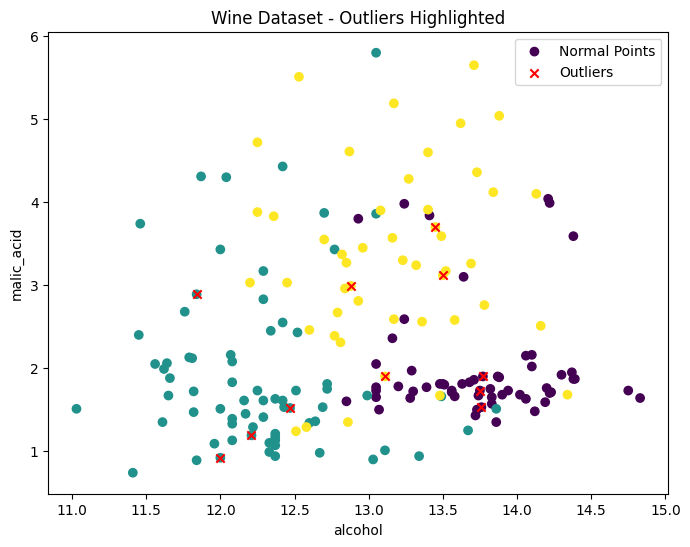

Outliers:
[1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
 2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
[1.42e+01 1.76e+00 2.45e+00 1.52e+01 1.12e+02 3.27e+00 3.39e+00 3.40e-01
 1.97e+00 6.75e+00 1.05e+00 2.85e+00 1.45e+03]
[1.375e+01 1.730e+00 2.410e+00 1.600e+01 8.900e+01 2.600e+00 2.760e+00
 2.900e-01 1.810e+00 5.600e+00 1.150e+00 2.900e+00 1.320e+03]
[1.376e+01 1.530e+00 2.700e+00 1.950e+01 1.320e+02 2.950e+00 2.740e+00
 5.000e-01 1.350e+00 5.400e+00 1.250e+00 3.000e+00 1.235e+03]
[1.377e+01 1.900e+00 2.680e+00 1.710e+01 1.150e+02 3.000e+00 2.790e+00
 3.900e-01 1.680e+00 6.300e+00 1.130e+00 2.930e+00 1.375e+03]
[1.221e+01 1.190e+00 1.750e+00 1.680e+01 1.510e+02 1.850e+00 1.280e+00
 1.400e-01 2.500e+00 2.850e+00 1.280e+00 3.070e+00 7.180e+02]
[1.299e+01 1.670e+00 2.600e+00 3.000e+01 1.390e+02 3.300e+00 2.890e+00
 2.100e-01 1.960e+00 3.350e+00 1.310e+00 3.500e+00 9.850e+02]
[1.184e+01 2.890e+00 2.230e+00 1.800e+01 1.120e+02 1.720e+00 1.320e+00
 

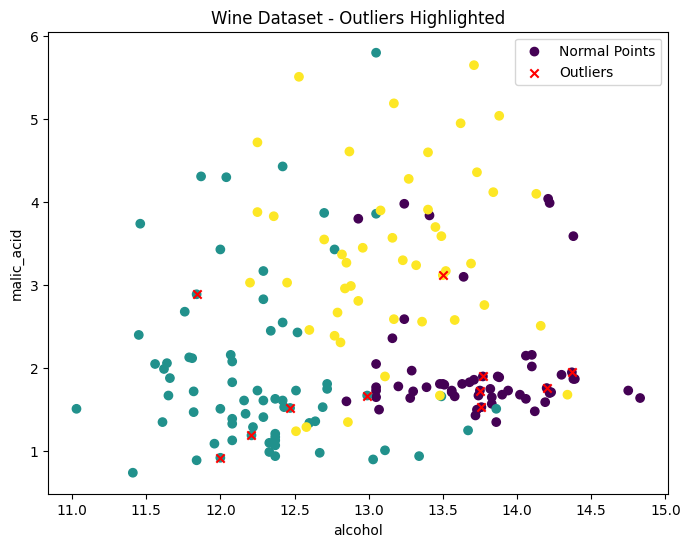

Outliers:
[1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
 2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
[1.42e+01 1.76e+00 2.45e+00 1.52e+01 1.12e+02 3.27e+00 3.39e+00 3.40e-01
 1.97e+00 6.75e+00 1.05e+00 2.85e+00 1.45e+03]
[1.41e+01 2.16e+00 2.30e+00 1.80e+01 1.05e+02 2.95e+00 3.32e+00 2.20e-01
 2.38e+00 5.75e+00 1.25e+00 3.17e+00 1.51e+03]
[1.438e+01 1.870e+00 2.380e+00 1.200e+01 1.020e+02 3.300e+00 3.640e+00
 2.900e-01 2.960e+00 7.500e+00 1.200e+00 3.000e+00 1.547e+03]
[1.419e+01 1.590e+00 2.480e+00 1.650e+01 1.080e+02 3.300e+00 3.930e+00
 3.200e-01 1.860e+00 8.700e+00 1.230e+00 2.820e+00 1.680e+03]
[1.358e+01 1.660e+00 2.360e+00 1.910e+01 1.060e+02 2.860e+00 3.190e+00
 2.200e-01 1.950e+00 6.900e+00 1.090e+00 2.880e+00 1.515e+03]
[1.376e+01 1.530e+00 2.700e+00 1.950e+01 1.320e+02 2.950e+00 2.740e+00
 5.000e-01 1.350e+00 5.400e+00 1.250e+00 3.000e+00 1.235e+03]
[1.377e+01 1.900e+00 2.680e+00 1.710e+01 1.150e+02 3.000e+00 2.790e+00
 3.900e-01 1.6

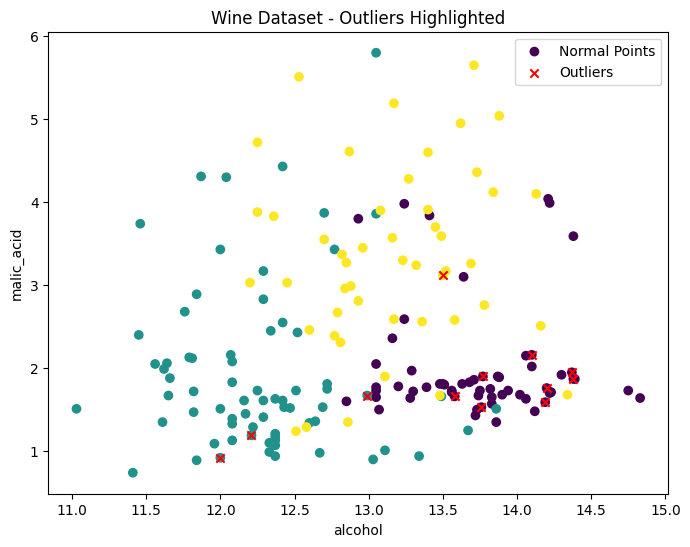

Outliers:
[1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
 2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
[1.42e+01 1.76e+00 2.45e+00 1.52e+01 1.12e+02 3.27e+00 3.39e+00 3.40e-01
 1.97e+00 6.75e+00 1.05e+00 2.85e+00 1.45e+03]
[1.41e+01 2.16e+00 2.30e+00 1.80e+01 1.05e+02 2.95e+00 3.32e+00 2.20e-01
 2.38e+00 5.75e+00 1.25e+00 3.17e+00 1.51e+03]
[1.438e+01 1.870e+00 2.380e+00 1.200e+01 1.020e+02 3.300e+00 3.640e+00
 2.900e-01 2.960e+00 7.500e+00 1.200e+00 3.000e+00 1.547e+03]
[1.419e+01 1.590e+00 2.480e+00 1.650e+01 1.080e+02 3.300e+00 3.930e+00
 3.200e-01 1.860e+00 8.700e+00 1.230e+00 2.820e+00 1.680e+03]
[1.358e+01 1.660e+00 2.360e+00 1.910e+01 1.060e+02 2.860e+00 3.190e+00
 2.200e-01 1.950e+00 6.900e+00 1.090e+00 2.880e+00 1.515e+03]
[1.376e+01 1.530e+00 2.700e+00 1.950e+01 1.320e+02 2.950e+00 2.740e+00
 5.000e-01 1.350e+00 5.400e+00 1.250e+00 3.000e+00 1.235e+03]
[1.377e+01 1.900e+00 2.680e+00 1.710e+01 1.150e+02 3.000e+00 2.790e+00
 3.900e-01 1.6

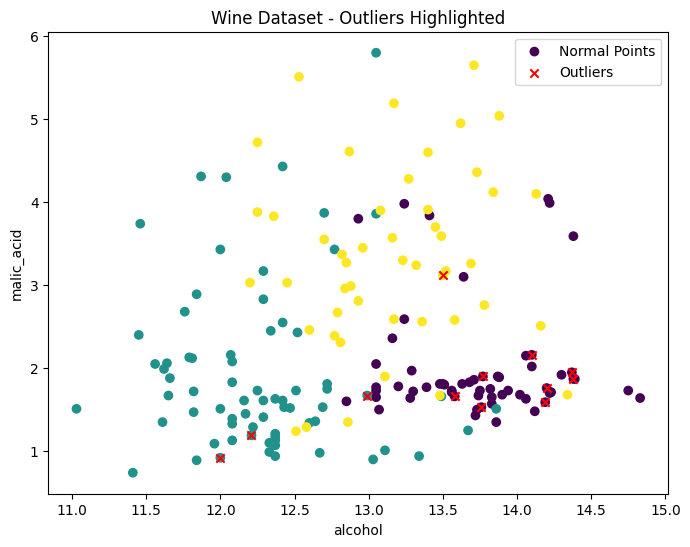

Outliers:
[1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
 2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
[1.42e+01 1.76e+00 2.45e+00 1.52e+01 1.12e+02 3.27e+00 3.39e+00 3.40e-01
 1.97e+00 6.75e+00 1.05e+00 2.85e+00 1.45e+03]
[1.41e+01 2.16e+00 2.30e+00 1.80e+01 1.05e+02 2.95e+00 3.32e+00 2.20e-01
 2.38e+00 5.75e+00 1.25e+00 3.17e+00 1.51e+03]
[1.438e+01 1.870e+00 2.380e+00 1.200e+01 1.020e+02 3.300e+00 3.640e+00
 2.900e-01 2.960e+00 7.500e+00 1.200e+00 3.000e+00 1.547e+03]
[1.419e+01 1.590e+00 2.480e+00 1.650e+01 1.080e+02 3.300e+00 3.930e+00
 3.200e-01 1.860e+00 8.700e+00 1.230e+00 2.820e+00 1.680e+03]
[1.358e+01 1.660e+00 2.360e+00 1.910e+01 1.060e+02 2.860e+00 3.190e+00
 2.200e-01 1.950e+00 6.900e+00 1.090e+00 2.880e+00 1.515e+03]
[1.376e+01 1.530e+00 2.700e+00 1.950e+01 1.320e+02 2.950e+00 2.740e+00
 5.000e-01 1.350e+00 5.400e+00 1.250e+00 3.000e+00 1.235e+03]
[1.377e+01 1.900e+00 2.680e+00 1.710e+01 1.150e+02 3.000e+00 2.790e+00
 3.900e-01 1.6

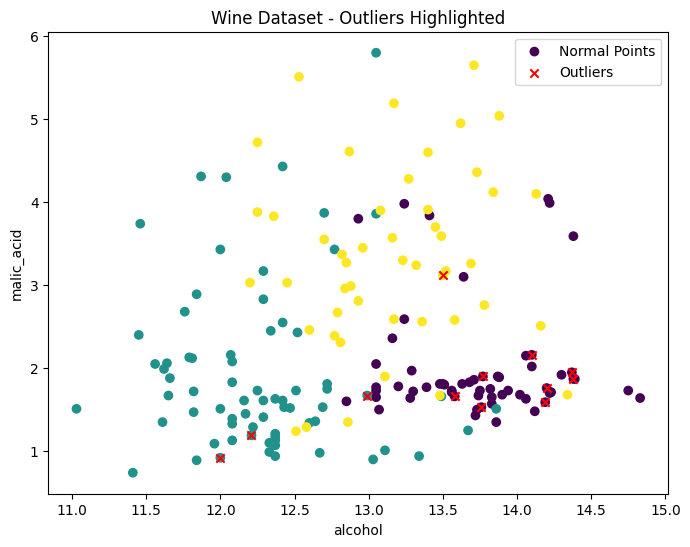

Outliers:
[1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
 2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
[1.42e+01 1.76e+00 2.45e+00 1.52e+01 1.12e+02 3.27e+00 3.39e+00 3.40e-01
 1.97e+00 6.75e+00 1.05e+00 2.85e+00 1.45e+03]
[1.41e+01 2.16e+00 2.30e+00 1.80e+01 1.05e+02 2.95e+00 3.32e+00 2.20e-01
 2.38e+00 5.75e+00 1.25e+00 3.17e+00 1.51e+03]
[1.438e+01 1.870e+00 2.380e+00 1.200e+01 1.020e+02 3.300e+00 3.640e+00
 2.900e-01 2.960e+00 7.500e+00 1.200e+00 3.000e+00 1.547e+03]
[1.419e+01 1.590e+00 2.480e+00 1.650e+01 1.080e+02 3.300e+00 3.930e+00
 3.200e-01 1.860e+00 8.700e+00 1.230e+00 2.820e+00 1.680e+03]
[1.358e+01 1.660e+00 2.360e+00 1.910e+01 1.060e+02 2.860e+00 3.190e+00
 2.200e-01 1.950e+00 6.900e+00 1.090e+00 2.880e+00 1.515e+03]
[1.377e+01 1.900e+00 2.680e+00 1.710e+01 1.150e+02 3.000e+00 2.790e+00
 3.900e-01 1.680e+00 6.300e+00 1.130e+00 2.930e+00 1.375e+03]
[1.221e+01 1.190e+00 1.750e+00 1.680e+01 1.510e+02 1.850e+00 1.280e+00
 1.400e-01 2.5

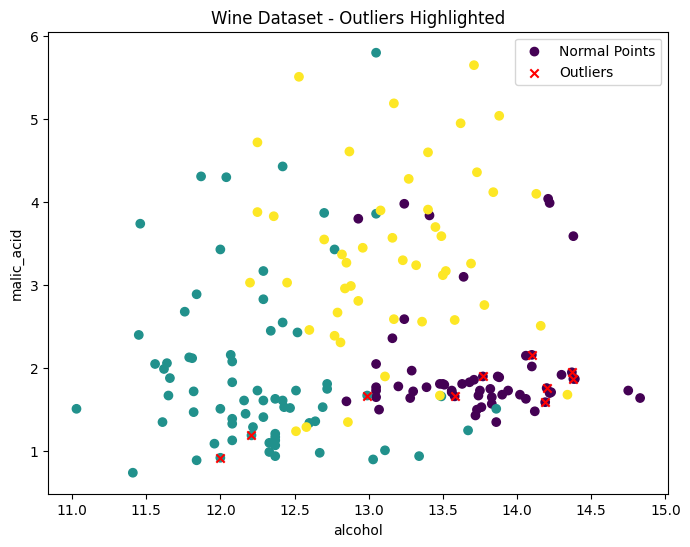

Outliers:
[1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
 2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
[1.42e+01 1.76e+00 2.45e+00 1.52e+01 1.12e+02 3.27e+00 3.39e+00 3.40e-01
 1.97e+00 6.75e+00 1.05e+00 2.85e+00 1.45e+03]
[1.41e+01 2.16e+00 2.30e+00 1.80e+01 1.05e+02 2.95e+00 3.32e+00 2.20e-01
 2.38e+00 5.75e+00 1.25e+00 3.17e+00 1.51e+03]
[1.438e+01 1.870e+00 2.380e+00 1.200e+01 1.020e+02 3.300e+00 3.640e+00
 2.900e-01 2.960e+00 7.500e+00 1.200e+00 3.000e+00 1.547e+03]
[1.419e+01 1.590e+00 2.480e+00 1.650e+01 1.080e+02 3.300e+00 3.930e+00
 3.200e-01 1.860e+00 8.700e+00 1.230e+00 2.820e+00 1.680e+03]
[1.358e+01 1.660e+00 2.360e+00 1.910e+01 1.060e+02 2.860e+00 3.190e+00
 2.200e-01 1.950e+00 6.900e+00 1.090e+00 2.880e+00 1.515e+03]
[1.377e+01 1.900e+00 2.680e+00 1.710e+01 1.150e+02 3.000e+00 2.790e+00
 3.900e-01 1.680e+00 6.300e+00 1.130e+00 2.930e+00 1.375e+03]
[ 12.     0.92   2.    19.    86.     2.42   2.26   0.3    1.43   2.5
   1.38   3.12 

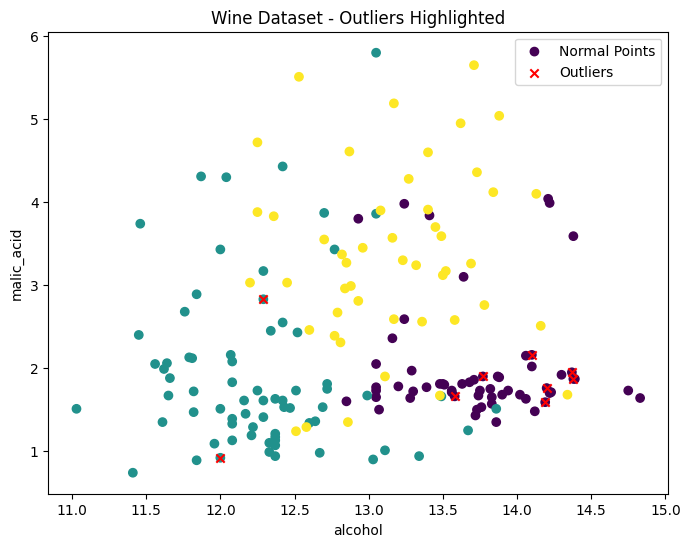

Outliers:
[1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
 2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
[1.42e+01 1.76e+00 2.45e+00 1.52e+01 1.12e+02 3.27e+00 3.39e+00 3.40e-01
 1.97e+00 6.75e+00 1.05e+00 2.85e+00 1.45e+03]
[1.41e+01 2.16e+00 2.30e+00 1.80e+01 1.05e+02 2.95e+00 3.32e+00 2.20e-01
 2.38e+00 5.75e+00 1.25e+00 3.17e+00 1.51e+03]
[1.438e+01 1.870e+00 2.380e+00 1.200e+01 1.020e+02 3.300e+00 3.640e+00
 2.900e-01 2.960e+00 7.500e+00 1.200e+00 3.000e+00 1.547e+03]
[1.419e+01 1.590e+00 2.480e+00 1.650e+01 1.080e+02 3.300e+00 3.930e+00
 3.200e-01 1.860e+00 8.700e+00 1.230e+00 2.820e+00 1.680e+03]
[1.358e+01 1.660e+00 2.360e+00 1.910e+01 1.060e+02 2.860e+00 3.190e+00
 2.200e-01 1.950e+00 6.900e+00 1.090e+00 2.880e+00 1.515e+03]
[1.377e+01 1.900e+00 2.680e+00 1.710e+01 1.150e+02 3.000e+00 2.790e+00
 3.900e-01 1.680e+00 6.300e+00 1.130e+00 2.930e+00 1.375e+03]
[ 12.     0.92   2.    19.    86.     2.42   2.26   0.3    1.43   2.5
   1.38   3.12 

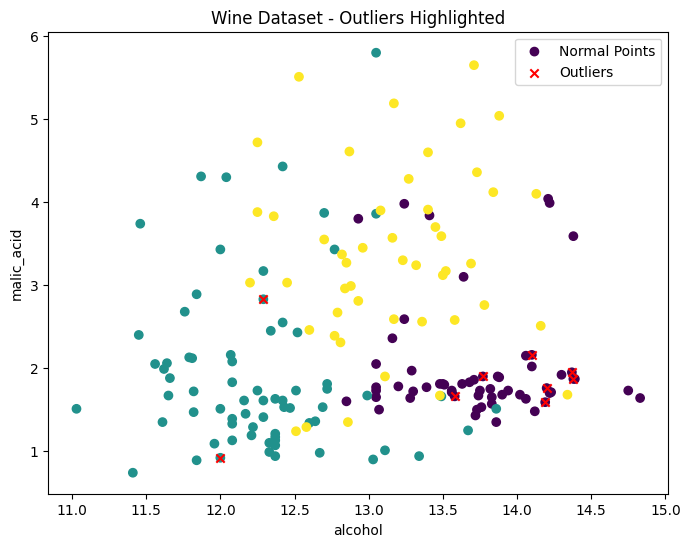

Outliers:
[1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
 2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
[1.42e+01 1.76e+00 2.45e+00 1.52e+01 1.12e+02 3.27e+00 3.39e+00 3.40e-01
 1.97e+00 6.75e+00 1.05e+00 2.85e+00 1.45e+03]
[1.41e+01 2.16e+00 2.30e+00 1.80e+01 1.05e+02 2.95e+00 3.32e+00 2.20e-01
 2.38e+00 5.75e+00 1.25e+00 3.17e+00 1.51e+03]
[1.438e+01 1.870e+00 2.380e+00 1.200e+01 1.020e+02 3.300e+00 3.640e+00
 2.900e-01 2.960e+00 7.500e+00 1.200e+00 3.000e+00 1.547e+03]
[1.419e+01 1.590e+00 2.480e+00 1.650e+01 1.080e+02 3.300e+00 3.930e+00
 3.200e-01 1.860e+00 8.700e+00 1.230e+00 2.820e+00 1.680e+03]
[1.358e+01 1.660e+00 2.360e+00 1.910e+01 1.060e+02 2.860e+00 3.190e+00
 2.200e-01 1.950e+00 6.900e+00 1.090e+00 2.880e+00 1.515e+03]
[1.221e+01 1.190e+00 1.750e+00 1.680e+01 1.510e+02 1.850e+00 1.280e+00
 1.400e-01 2.500e+00 2.850e+00 1.280e+00 3.070e+00 7.180e+02]
[ 12.     0.92   2.    19.    86.     2.42   2.26   0.3    1.43   2.5
   1.38   3.12 

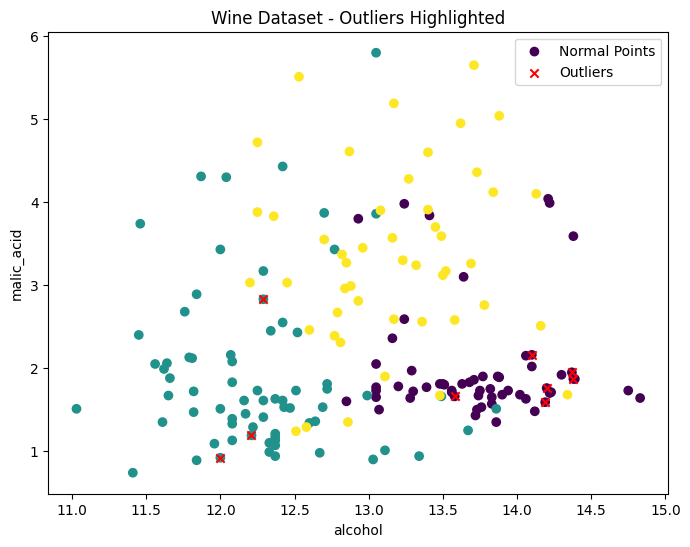

Outliers:
[1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
 2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
[1.42e+01 1.76e+00 2.45e+00 1.52e+01 1.12e+02 3.27e+00 3.39e+00 3.40e-01
 1.97e+00 6.75e+00 1.05e+00 2.85e+00 1.45e+03]
[1.41e+01 2.16e+00 2.30e+00 1.80e+01 1.05e+02 2.95e+00 3.32e+00 2.20e-01
 2.38e+00 5.75e+00 1.25e+00 3.17e+00 1.51e+03]
[1.438e+01 1.870e+00 2.380e+00 1.200e+01 1.020e+02 3.300e+00 3.640e+00
 2.900e-01 2.960e+00 7.500e+00 1.200e+00 3.000e+00 1.547e+03]
[1.419e+01 1.590e+00 2.480e+00 1.650e+01 1.080e+02 3.300e+00 3.930e+00
 3.200e-01 1.860e+00 8.700e+00 1.230e+00 2.820e+00 1.680e+03]
[1.358e+01 1.660e+00 2.360e+00 1.910e+01 1.060e+02 2.860e+00 3.190e+00
 2.200e-01 1.950e+00 6.900e+00 1.090e+00 2.880e+00 1.515e+03]
[ 12.     0.92   2.    19.    86.     2.42   2.26   0.3    1.43   2.5
   1.38   3.12 278.  ]
[1.229e+01 2.830e+00 2.220e+00 1.800e+01 8.800e+01 2.450e+00 2.250e+00
 2.500e-01 1.990e+00 2.150e+00 1.150e+00 3.300e+00 2.9

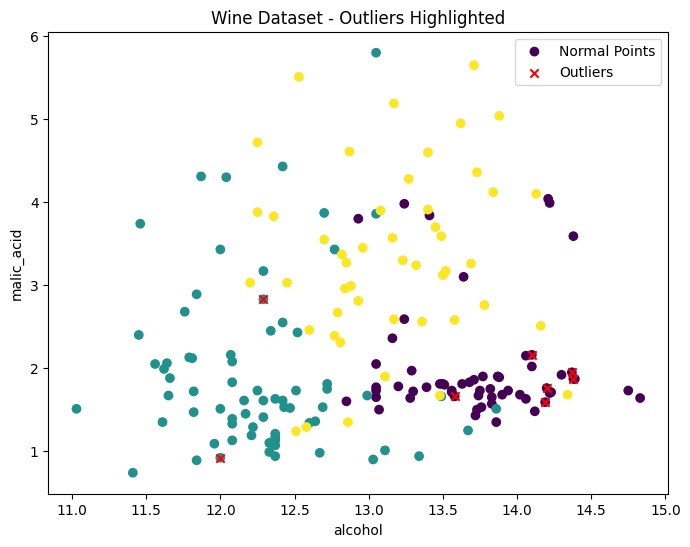

Outliers:
[1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
 2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
[1.41e+01 2.16e+00 2.30e+00 1.80e+01 1.05e+02 2.95e+00 3.32e+00 2.20e-01
 2.38e+00 5.75e+00 1.25e+00 3.17e+00 1.51e+03]
[1.438e+01 1.870e+00 2.380e+00 1.200e+01 1.020e+02 3.300e+00 3.640e+00
 2.900e-01 2.960e+00 7.500e+00 1.200e+00 3.000e+00 1.547e+03]
[1.419e+01 1.590e+00 2.480e+00 1.650e+01 1.080e+02 3.300e+00 3.930e+00
 3.200e-01 1.860e+00 8.700e+00 1.230e+00 2.820e+00 1.680e+03]
[1.358e+01 1.660e+00 2.360e+00 1.910e+01 1.060e+02 2.860e+00 3.190e+00
 2.200e-01 1.950e+00 6.900e+00 1.090e+00 2.880e+00 1.515e+03]
[ 12.     0.92   2.    19.    86.     2.42   2.26   0.3    1.43   2.5
   1.38   3.12 278.  ]


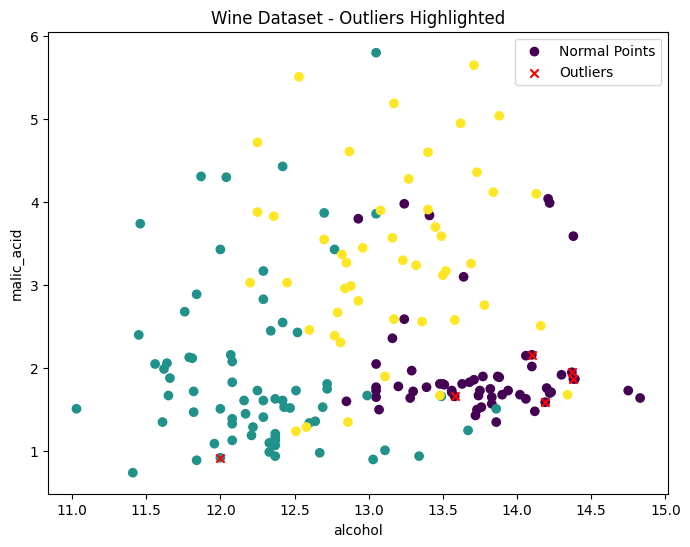

Outliers:
[1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
 2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
[1.41e+01 2.16e+00 2.30e+00 1.80e+01 1.05e+02 2.95e+00 3.32e+00 2.20e-01
 2.38e+00 5.75e+00 1.25e+00 3.17e+00 1.51e+03]
[1.438e+01 1.870e+00 2.380e+00 1.200e+01 1.020e+02 3.300e+00 3.640e+00
 2.900e-01 2.960e+00 7.500e+00 1.200e+00 3.000e+00 1.547e+03]
[1.419e+01 1.590e+00 2.480e+00 1.650e+01 1.080e+02 3.300e+00 3.930e+00
 3.200e-01 1.860e+00 8.700e+00 1.230e+00 2.820e+00 1.680e+03]
[1.358e+01 1.660e+00 2.360e+00 1.910e+01 1.060e+02 2.860e+00 3.190e+00
 2.200e-01 1.950e+00 6.900e+00 1.090e+00 2.880e+00 1.515e+03]
[ 12.     0.92   2.    19.    86.     2.42   2.26   0.3    1.43   2.5
   1.38   3.12 278.  ]


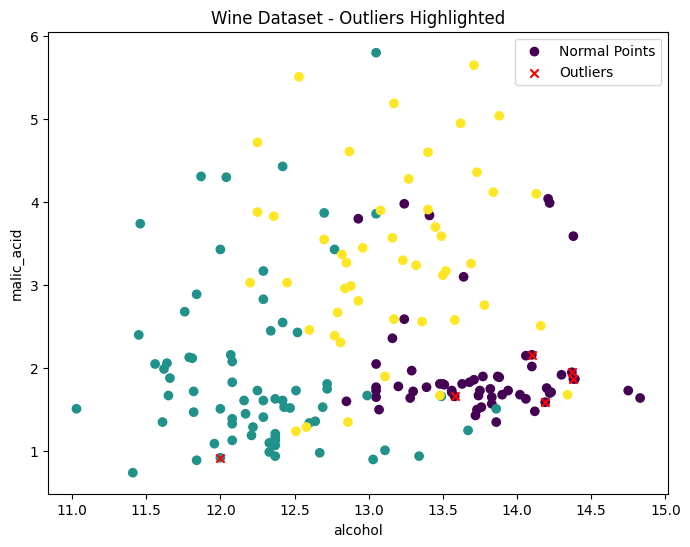

Outliers:
[1.41e+01 2.16e+00 2.30e+00 1.80e+01 1.05e+02 2.95e+00 3.32e+00 2.20e-01
 2.38e+00 5.75e+00 1.25e+00 3.17e+00 1.51e+03]
[1.438e+01 1.870e+00 2.380e+00 1.200e+01 1.020e+02 3.300e+00 3.640e+00
 2.900e-01 2.960e+00 7.500e+00 1.200e+00 3.000e+00 1.547e+03]
[1.419e+01 1.590e+00 2.480e+00 1.650e+01 1.080e+02 3.300e+00 3.930e+00
 3.200e-01 1.860e+00 8.700e+00 1.230e+00 2.820e+00 1.680e+03]
[1.358e+01 1.660e+00 2.360e+00 1.910e+01 1.060e+02 2.860e+00 3.190e+00
 2.200e-01 1.950e+00 6.900e+00 1.090e+00 2.880e+00 1.515e+03]
[ 12.     0.92   2.    19.    86.     2.42   2.26   0.3    1.43   2.5
   1.38   3.12 278.  ]
[1.229e+01 2.830e+00 2.220e+00 1.800e+01 8.800e+01 2.450e+00 2.250e+00
 2.500e-01 1.990e+00 2.150e+00 1.150e+00 3.300e+00 2.900e+02]


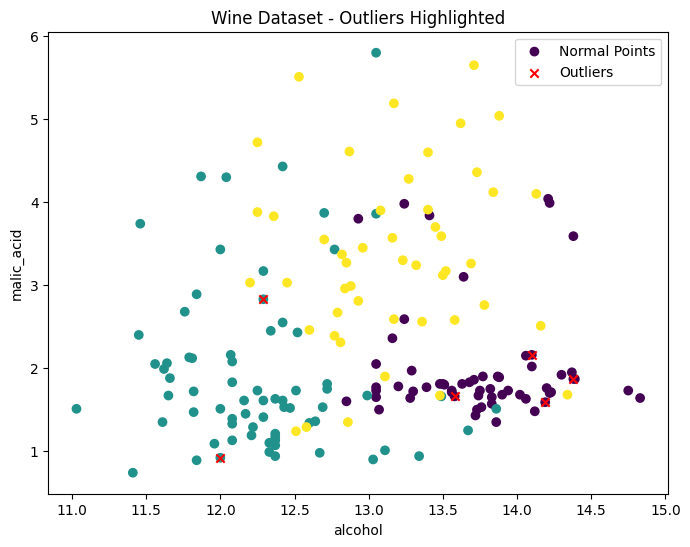

Outliers:
[1.41e+01 2.16e+00 2.30e+00 1.80e+01 1.05e+02 2.95e+00 3.32e+00 2.20e-01
 2.38e+00 5.75e+00 1.25e+00 3.17e+00 1.51e+03]
[1.438e+01 1.870e+00 2.380e+00 1.200e+01 1.020e+02 3.300e+00 3.640e+00
 2.900e-01 2.960e+00 7.500e+00 1.200e+00 3.000e+00 1.547e+03]
[1.419e+01 1.590e+00 2.480e+00 1.650e+01 1.080e+02 3.300e+00 3.930e+00
 3.200e-01 1.860e+00 8.700e+00 1.230e+00 2.820e+00 1.680e+03]
[1.358e+01 1.660e+00 2.360e+00 1.910e+01 1.060e+02 2.860e+00 3.190e+00
 2.200e-01 1.950e+00 6.900e+00 1.090e+00 2.880e+00 1.515e+03]
[ 12.     0.92   2.    19.    86.     2.42   2.26   0.3    1.43   2.5
   1.38   3.12 278.  ]


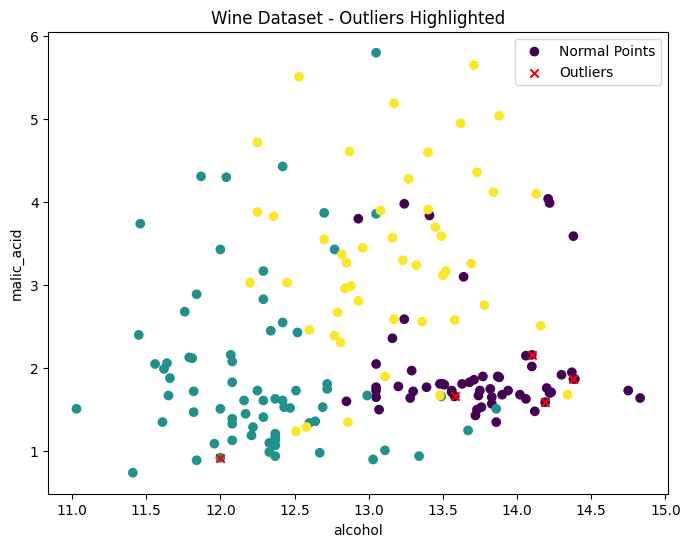

Outliers:
[1.438e+01 1.870e+00 2.380e+00 1.200e+01 1.020e+02 3.300e+00 3.640e+00
 2.900e-01 2.960e+00 7.500e+00 1.200e+00 3.000e+00 1.547e+03]
[1.419e+01 1.590e+00 2.480e+00 1.650e+01 1.080e+02 3.300e+00 3.930e+00
 3.200e-01 1.860e+00 8.700e+00 1.230e+00 2.820e+00 1.680e+03]
[1.358e+01 1.660e+00 2.360e+00 1.910e+01 1.060e+02 2.860e+00 3.190e+00
 2.200e-01 1.950e+00 6.900e+00 1.090e+00 2.880e+00 1.515e+03]
[ 12.     0.92   2.    19.    86.     2.42   2.26   0.3    1.43   2.5
   1.38   3.12 278.  ]
[1.229e+01 2.830e+00 2.220e+00 1.800e+01 8.800e+01 2.450e+00 2.250e+00
 2.500e-01 1.990e+00 2.150e+00 1.150e+00 3.300e+00 2.900e+02]


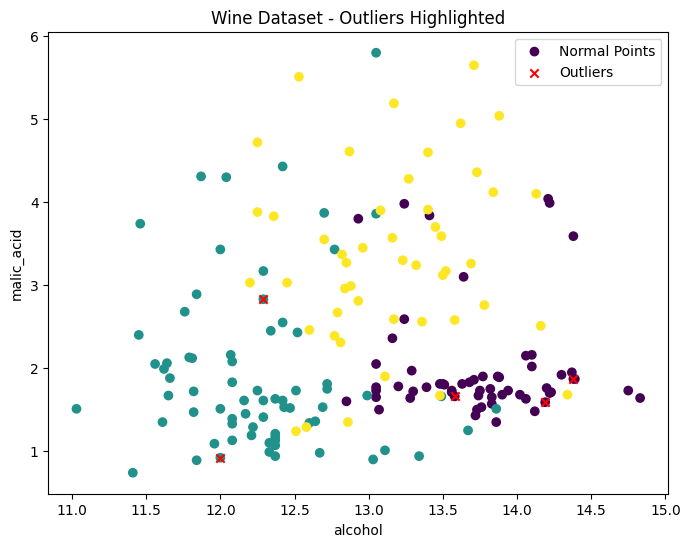

In [ ]:
# Implementing the Local outlier Factor
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
for i in range (1,20):
    lof = LocalOutlierFactor(n_neighbors=i)  # Adjust n_neighbors as needed
    y_pred = lof.fit_predict(X)

    # Find outliers (points with a prediction of -1)
    outliers = X[y_pred == -1]

    # Print the outliers
    print("Outliers:")
    for outlier in outliers:
        print(outlier)
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c= y , label='Normal Points')
    plt.scatter(outliers[:, 0], outliers[:, 1], c='red', marker='x', label='Outliers')
    plt.xlabel(data.feature_names[0])
    plt.ylabel(data.feature_names[1])
    plt.title('Wine Dataset - Outliers Highlighted')
    plt.legend()
    plt.show()

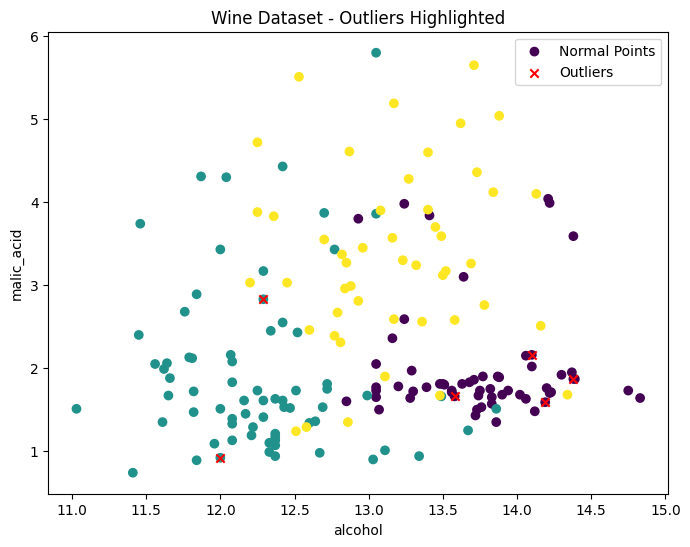

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c= y , label='Normal Points')
plt.scatter(outliers[:, 0], outliers[:, 1], c='red', marker='x', label='Outliers')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title('Wine Dataset - Outliers Highlighted')
plt.legend()
plt.show()

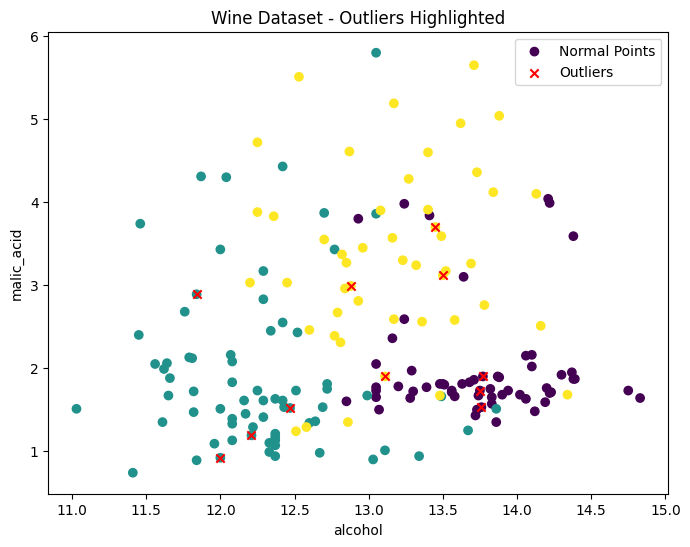

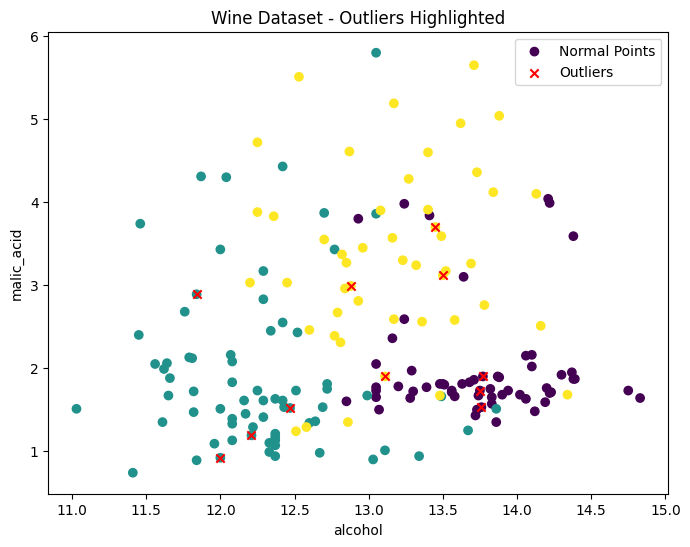

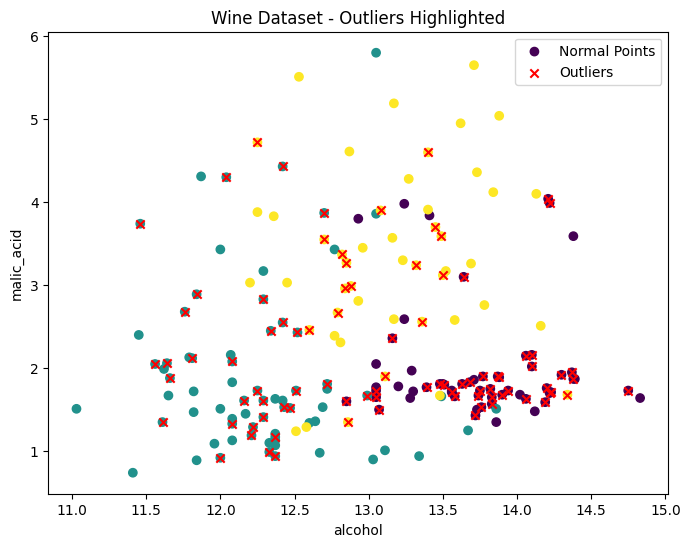

In [ ]:
lof = LocalOutlierFactor(n_neighbors=5, contamination = 0.5)  # Adjust n_neighbors as needed
y_pred = lof.fit_predict(X)
# Find outliers (points with a prediction of -1)
outliers = X[y_pred == -1]
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c= y , label='Normal Points')
plt.scatter(outliers[:, 0], outliers[:, 1], c='red', marker='x', label='Outliers')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title('Wine Dataset - Outliers Highlighted')
plt.legend()
plt.show()

Decision Trees

Accuracy: 1.0


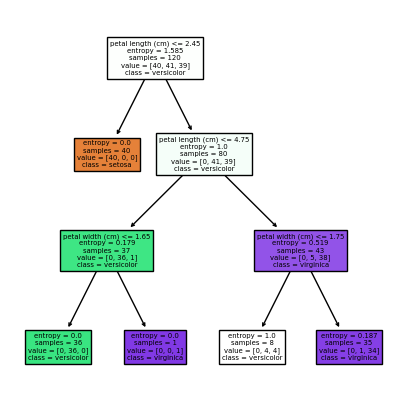

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(5, 5))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

Isolated Random Forest

In [ ]:
import pandas as pd
df = pd.read_csv("/content/water_potability.csv")

In [ ]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
column_means = df.mean(axis=0)
df.fillna(value=column_means, inplace=True)

In [ ]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
X = df.drop('Potability', axis=1)
y = df['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.6829268292682927


Principal Component Analysis


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Explained variance ratio: [0.04524172 0.02516348]


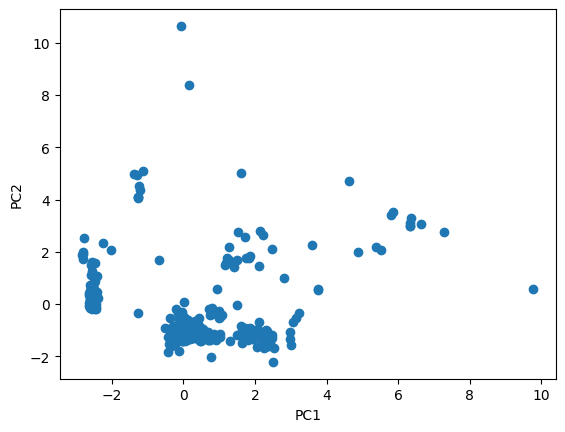

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

data = pd.read_csv('/content/cardata.csv')

categorical_columns = ['Car_Name','Fuel_Type','Seller_Type','Transmission']
numeric_columns = ['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']

encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(data[categorical_columns])

numeric_data = data[numeric_columns]
combined_data = pd.concat([numeric_data, pd.DataFrame(encoded_data)], axis=1)

combined_data.columns = combined_data.columns.astype(str)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(combined_data)

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Density-based Spatial Clustering

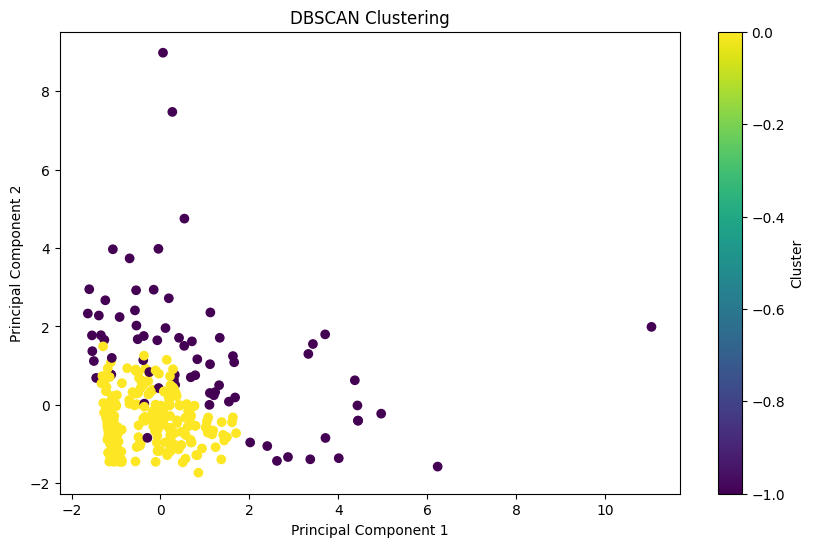

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


data = pd.read_csv('/content/cardata.csv')


feature_columns = ['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']

X = data[feature_columns]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster')
plt.show()